# Visualize network permutation

In [11]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from config import PIPELINE_RUN_DIR, AMIMS, NETWORKS, SEED_SETS
from functions import split_module_id, load_merged_stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
path = os.path.join(PIPELINE_RUN_DIR, "main/results/mqc_summaries/network_permutation_mqc.tsv")

In [10]:
amim_meta_df = pd.DataFrame.from_dict(AMIMS)
network_meta_df = pd.DataFrame.from_dict(NETWORKS)
seed_meta_df = pd.DataFrame.from_dict(SEED_SETS)

# Drop "no_tool" from the amim meta df
amim_meta_df = amim_meta_df[amim_meta_df.id != "no_tool"]


df = pd.read_csv(path, sep="\t")
df[["seed_id","network_id","amim_id"]] = df.id.apply(split_module_id)
df["network"] = df["network_id"].replace(dict(zip(network_meta_df.id, network_meta_df.label)))
df["amim"] = df["amim_id"].replace(dict(zip(amim_meta_df.id, amim_meta_df.label)))

merged_df = df.merge(load_merged_stats(),on=["seed_id", "network_id", "network", "amim_id", "amim"], how="left")
# drop nans for empty modules
merged_df = merged_df.dropna(subset=["avg_jaccard_index"])


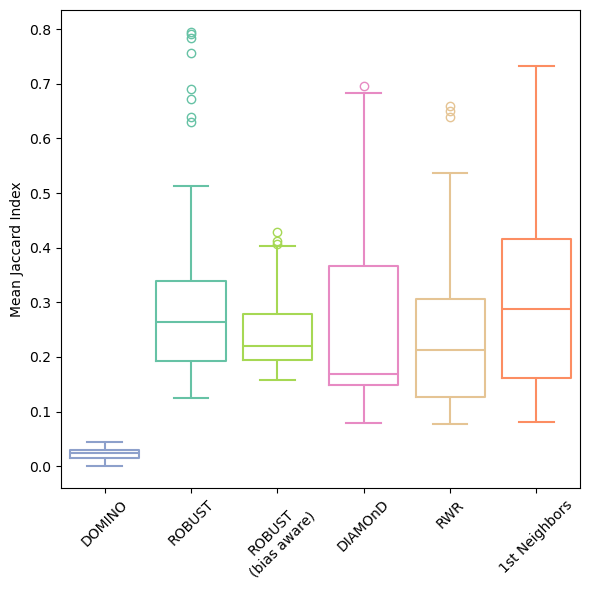

In [5]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="avg_jaccard_index", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Mean Jaccard Index")
plt.tight_layout()
plt.show()


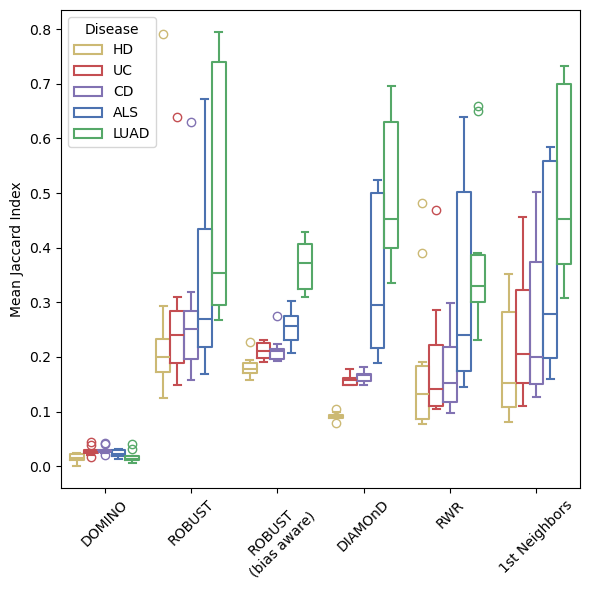

In [6]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="avg_jaccard_index", hue="seed_id", x="amim", fill=False, palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), order=amim_meta_df.label, hue_order=seed_meta_df.short)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Mean Jaccard Index")
plt.legend(title="Disease")
plt.tight_layout()
plt.show()

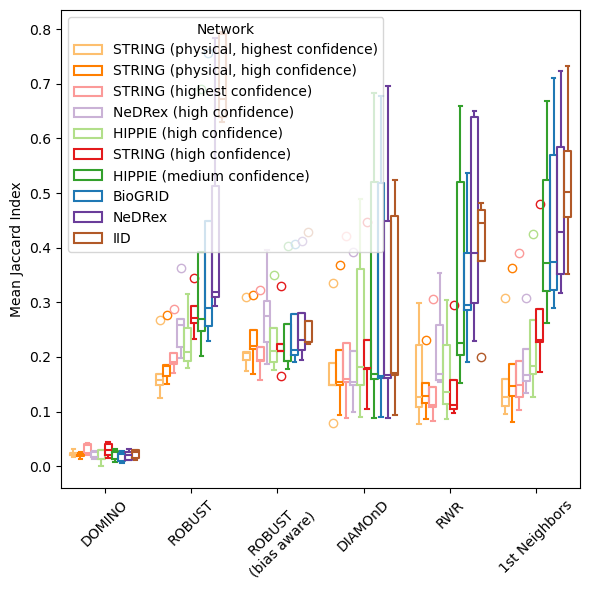

In [7]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="avg_jaccard_index", hue="network", x="amim", fill=False, palette=dict(zip(network_meta_df.label, network_meta_df.color)), order=amim_meta_df.label, hue_order=network_meta_df.label)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Mean Jaccard Index")
plt.legend(title="Network")
plt.tight_layout()
plt.show()

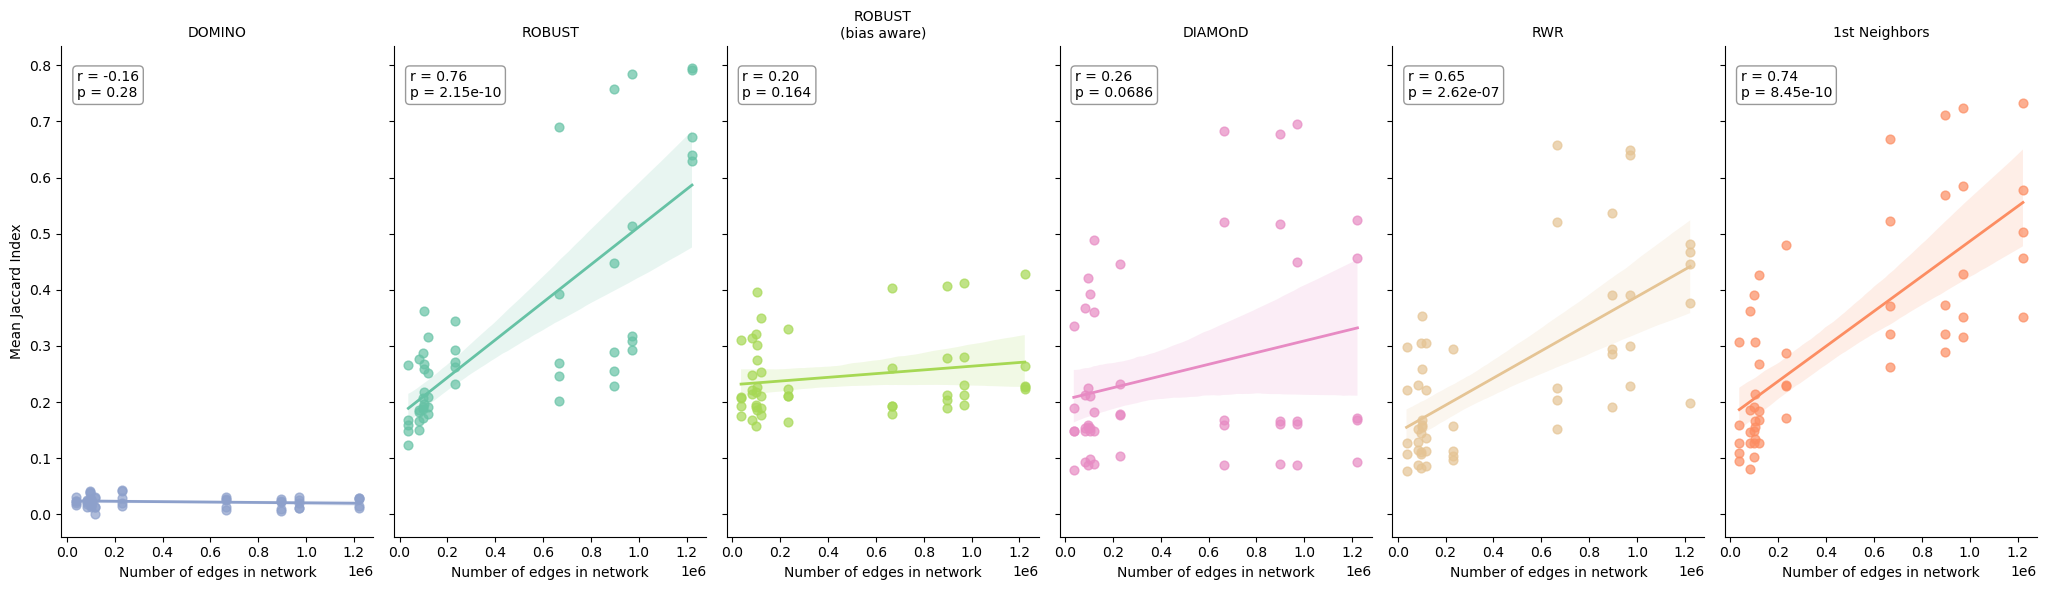

In [12]:
# Create the lmplot
g = sns.lmplot(
    data=merged_df,
    x="edges_network",
    y="avg_jaccard_index",
    col="amim",       # One facet per 'amim' level
    col_order=amim_meta_df.label,
    hue="amim",
    hue_order=amim_meta_df.label,
    palette=dict(zip(amim_meta_df.label, amim_meta_df.color)),
    legend=True,
    height=6,
    aspect=4/7,
    scatter_kws={"s": 40, "alpha": 0.7},
    line_kws={"linewidth": 2},
    facet_kws={"sharex": False,},
)

# Custom annotation function
def annotate_corr(data, **kwargs):
    r, p = pearsonr(data["edges_network"], data["avg_jaccard_index"])
    ax = plt.gca()
    ax.text(
        0.05, 0.95,
        f"r = {r:.2f}\np = {p:.3g}",
        transform=ax.transAxes,
        verticalalignment="top",
        horizontalalignment="left",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray", alpha=0.8)
    )

# Apply the annotation function to each facet
g.map_dataframe(annotate_corr)

g.set_axis_labels("Number of edges in network", "Mean Jaccard Index")
g.set_titles("{col_name}")  # removes facet titles

plt.tight_layout()
plt.show()

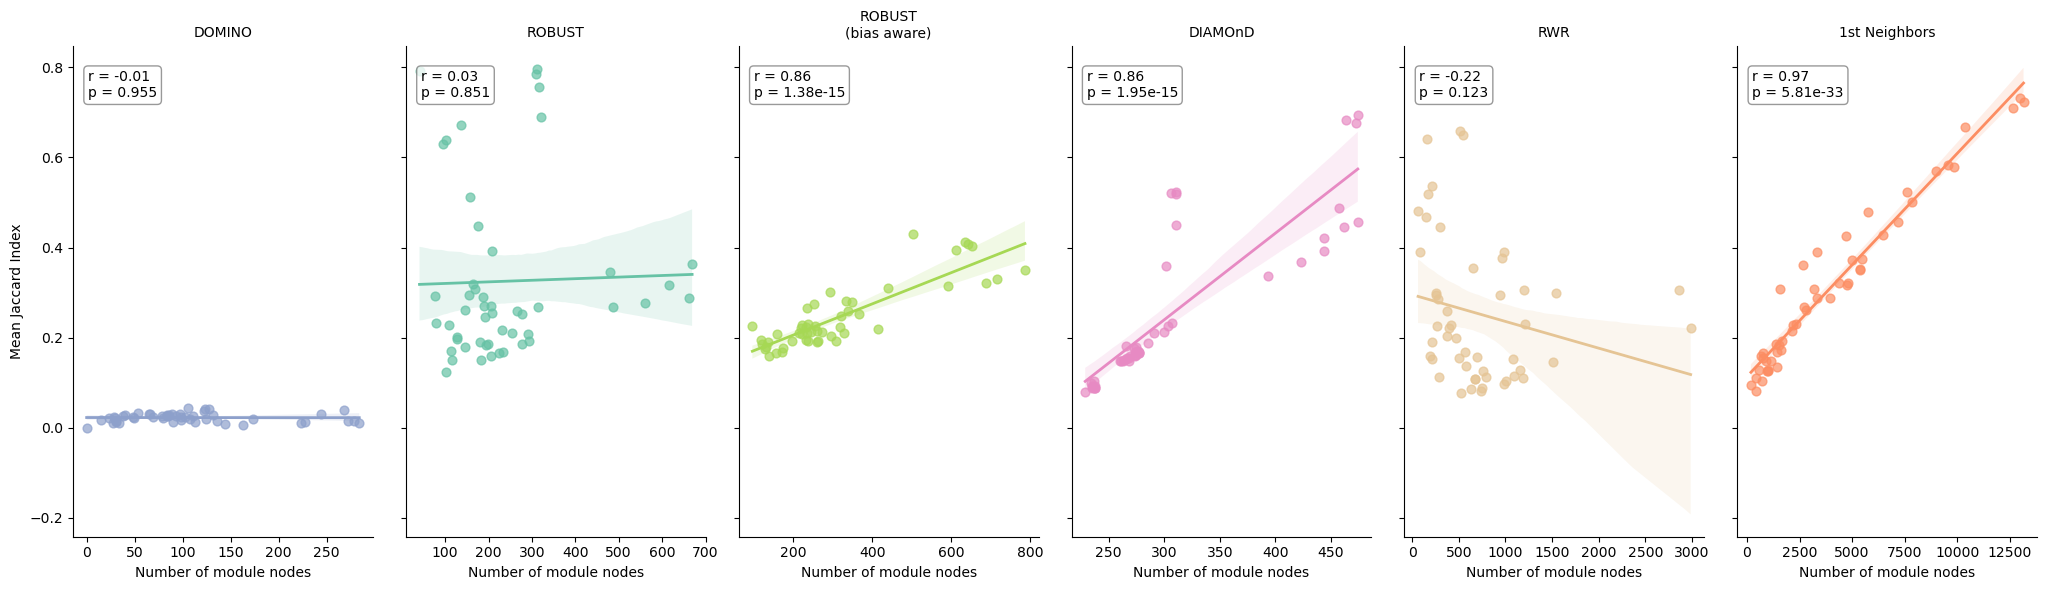

In [13]:
# Create the lmplot
g = sns.lmplot(
    data=merged_df,
    x="nodes_module",
    y="avg_jaccard_index",
    col="amim",       # One facet per 'amim' level
    col_order=amim_meta_df.label,
    hue="amim",
    hue_order=amim_meta_df.label,
    palette=dict(zip(amim_meta_df.label, amim_meta_df.color)),
    legend=True,
    height=6,
    aspect=4/7,
    scatter_kws={"s": 40, "alpha": 0.7},
    line_kws={"linewidth": 2},
    facet_kws={"sharex": False,},
)

# Custom annotation function
def annotate_corr(data, **kwargs):
    r, p = pearsonr(data["nodes_module"], data["avg_jaccard_index"])
    ax = plt.gca()
    ax.text(
        0.05, 0.95,
        f"r = {r:.2f}\np = {p:.3g}",
        transform=ax.transAxes,
        verticalalignment="top",
        horizontalalignment="left",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray", alpha=0.8)
    )

# Apply the annotation function to each facet
g.map_dataframe(annotate_corr)

g.set_axis_labels("Number of module nodes", "Mean Jaccard Index")
g.set_titles("{col_name}")  # removes facet titles

plt.tight_layout()
plt.show()